# This notebook is to explore the possibility of using fast embedding method to embed the whole Kapoor network

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
import os
from sys import platform 
from src.embedding.fast_network_embedding import *
from src.eda.eda_functions import (plot_gene_cnt_each_cluster, get_closest_genes_jaccard, plot_dist,
                                   plot_sig_perc, cluster_phenotype_corr,
                                   cluster_jaccard_v2, run_kmeans, cluster_DE_perc, cluster_nmi_v3,
                                   plot_gene_cnt_each_cluster_v2, plot_cluster_nmi_comparison_v3)
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time 
embedding_path = prefix+'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Feb16/embedded_ggvec_epoch=200_alpha=0.1_tol_samples=20'
emb_df = network_embedding_fast(prefix+'/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv',
                                max_epoch=10, learning_rate=0.1,
                                output_path=embedding_path)

using read_adjacency not read_edgelist
memory0 7118.796875
elist size 0 57878489604
nnodes: 19911 dtype: <class 'numpy.uint16'>
memory1 7120.3359375
elist size 1 57878489604
memory2 2508.34375
elist size 2 2378568204
memory3 2507.84765625
elist size 3 2378568204
before elist.copy
memory4 4769.234375
memory4a 16075.421875
memory5 10781.78125
memory6 10781.78515625
memory7 4732.7734375
memory8 12006.796875
read_adjacency success


c:\users\bbche\documents\gitrepos\csrgraph\csrgraph\ggvec.py:207: UserWarning: GVec has not converged. Losses : [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.0047826555759813375, 0.003691977932300477, 0.0035997068504888103, 0.0035915763380409086, 0.003590665841100278, 0.0035894098239666705, 0.0035902620200153764, 0.003587775898635094, 0.0035874150588424618, 0.0035881727850030866]
  warnings.warn(f"GVec has not converged. Losses : {latest_loss}")


fit_transform success
embedding data saved
Wall time: 30min 33s


In [26]:
%%time
emb_df = network_embedding_fast(prefix+'/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv',
                                max_epoch=100, learning_rate=0.1,
                                output_dir=embedding_path)
# emb_df = network_embedding_fast(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/Kapoor_edge.txt', 
#                                 max_epoch = 80 ,learning_rate = 0.1, 
#                                 output_dir = embedding_path, name_spec = 'epoch=80_alpha=0.1')

embedding data saved
Wall time: 2h 34min 49s


In [32]:
%%time
emb_df = network_embedding_fast(prefix+'/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv',
                                max_epoch=200, learning_rate=0.1, tol_samples=20,
                                output_dir=embedding_path)
# emb_df = network_embedding_fast(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/Kapoor_edge.txt', 
#                                 max_epoch = 200 ,learning_rate = 0.1, tol_samples=20,
#                                 output_dir = embedding_path, name_spec = 'epoch=200_alpha=0.1_tol_samples=20')

embedding data saved
Wall time: 52min 48s


# Load all embeddings

In [2]:
# embedding_path = prefix+'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_March4'

In [5]:
cluster_id_dict = {}
for num in range(10):
    cluster_id_dict[num] = chr(ord('@')+num+1)

In [4]:
## The following one is just from the extra fast embedding with changes in the CSRGraph package
# emb1 = pd.read_csv(os.path.join(embedding_path, 'embedded_ggvec_fast_epoch=100_alpha=0.1.csv'), index_col = 0)
# emb_list = [emb1]
# emb_names = ['fast_epoch=100_alpha=0.1']
# kmeans_list = [run_kmeans(emb1, 10)]
emb_list = []
emb_names = []
kmeans_list = []
embedding_path = prefix+'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Feb16'

for file in os.listdir(embedding_path):
    emb = pd.read_csv(os.path.join(embedding_path, file), index_col = 0)
    emb_list.append(emb)
    emb_names.append(file.split('ggvec_')[1][:-4])
    kmeans = run_kmeans(emb, 10)
    kmeans.kmean_label = kmeans.kmean_label.map(cluster_id_dict)
    kmeans_list.append(kmeans)

In [6]:
# load only a single embedding
embedding_path = prefix+'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Feb16'
emb_name = 'embedded_ggvec_epoch=100_alpha=0.1.csv'.split('ggvec_')[1][:-4]
emb_df = pd.read_csv(os.path.join(embedding_path, 'embedded_ggvec_epoch=100_alpha=0.1.csv'), index_col = 0)
kmeans = run_kmeans(emb_df, 10)
kmeans.cluster_id = kmeans.cluster_id.map(cluster_id_dict)

In [7]:
deseq = pd.read_excel(prefix + '/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')
deseq['abs_log2FC'] = abs(deseq['log2FoldChange'])

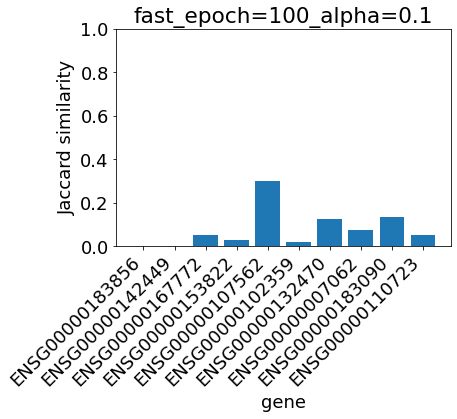

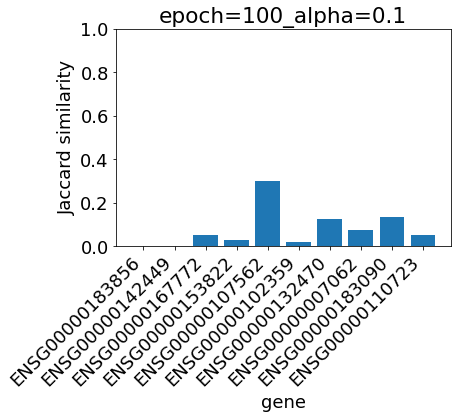

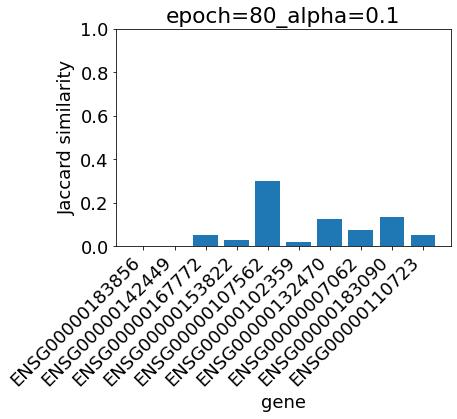

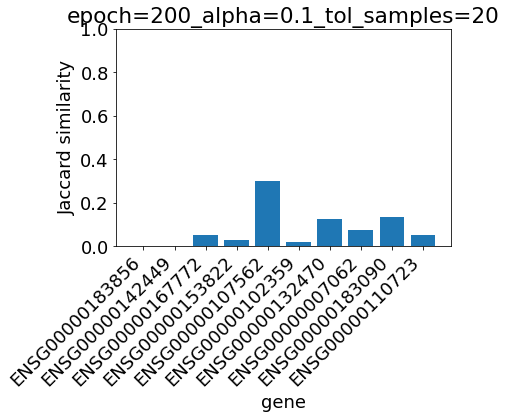

In [32]:
top_n_de = deseq.sort_values('abs_log2FC', ascending = False)['id'][10:20]
for emb, name in zip(emb_list, emb_names):
    get_closest_genes_jaccard(tom_df, emb, top_n_de, 50, name)

In [8]:
louvain_default = pd.read_csv(prefix+'/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')

In [20]:
# wgcna_modules = pd.read_csv(prefix+'/Shared drives/NIAAA_ASSIST/Data/eda_derived/wgcna_modules.csv')

Removing existing folder: output
Created folder output


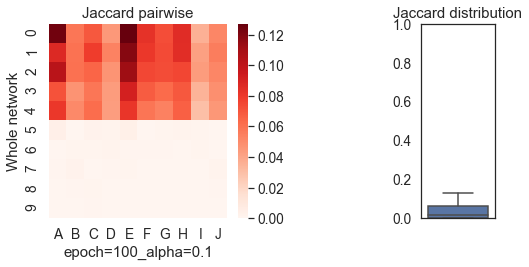

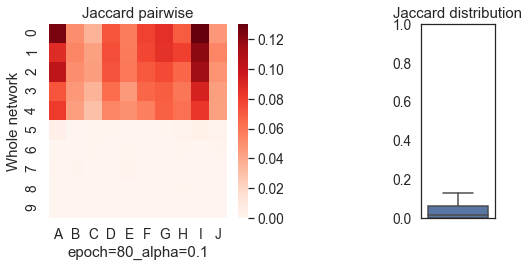

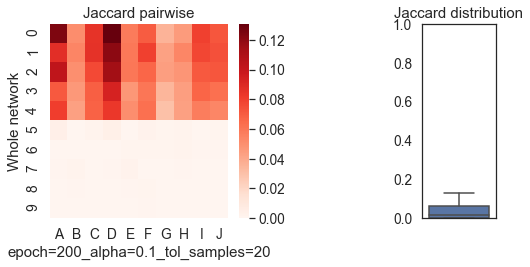

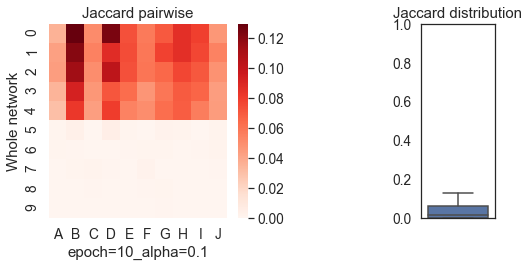

In [7]:
for kmeans, name in zip(kmeans_list, emb_names):
    cluster_jaccard_v2(louvain_default, kmeans, 'louvain_label', 'kmean_label', ['Whole network', name])

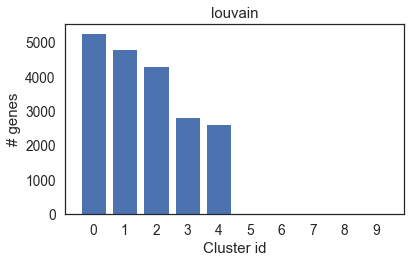

In [8]:
plot_gene_cnt_each_cluster([louvain_default], 'louvain_label', ['louvain'])

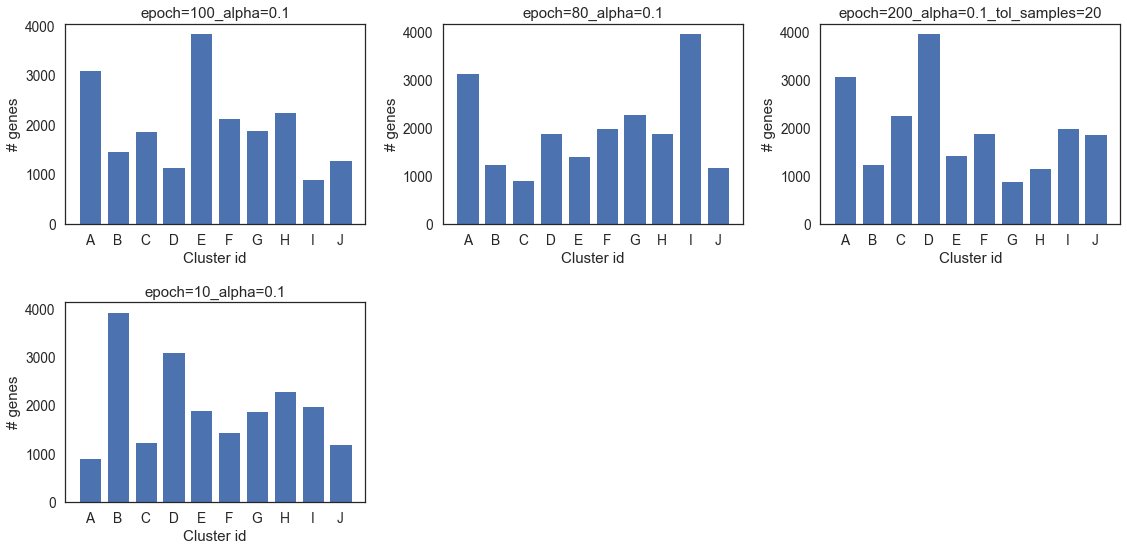

In [9]:
plot_gene_cnt_each_cluster(kmeans_list, 'kmean_label', emb_names)

In [ ]:
## plot_gene_cnt_each_cluster_v2() to plot just 1 graph at a time

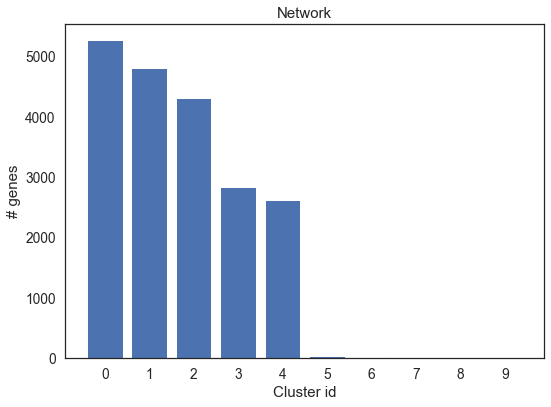

In [10]:
plot_gene_cnt_each_cluster_v2(louvain_default, 'Network')

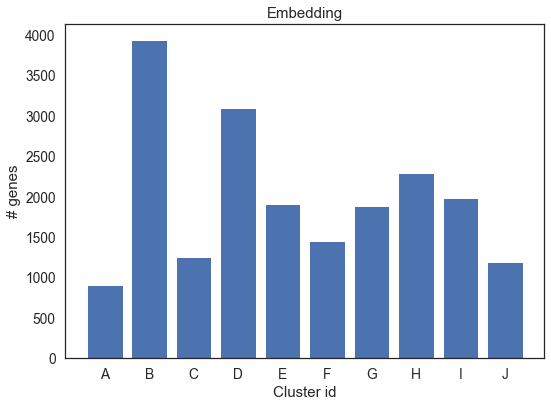

In [11]:
plot_gene_cnt_each_cluster_v2(kmeans, 'Embedding')

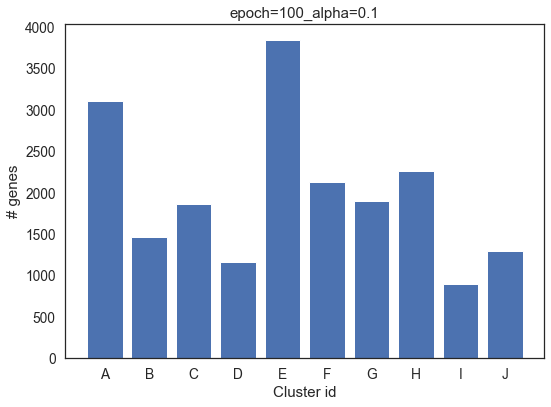

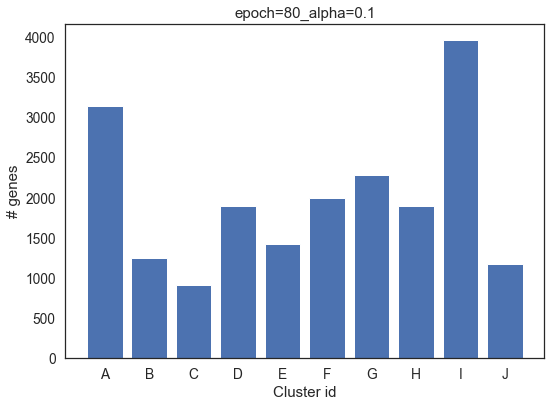

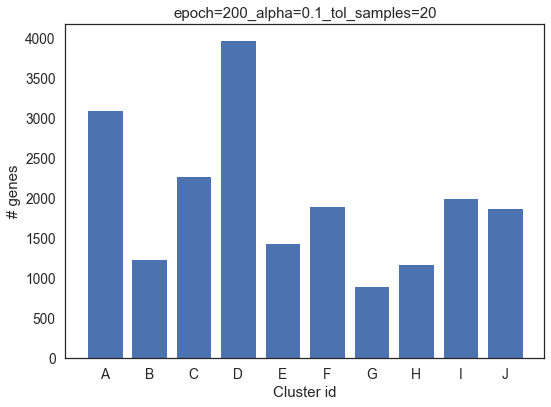

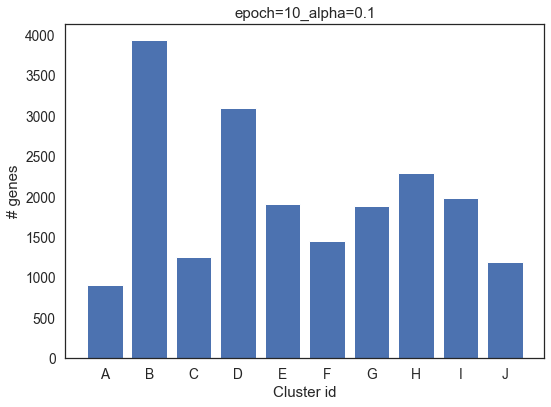

In [12]:
for kmeans, name in zip(kmeans_list, emb_names):
    plot_gene_cnt_each_cluster_v2(kmeans, name, '_embedding')

Removing existing folder: output
Created folder output


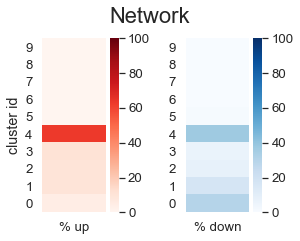

In [9]:
cluster_DE_perc(louvain_default, 'Network', deseq)

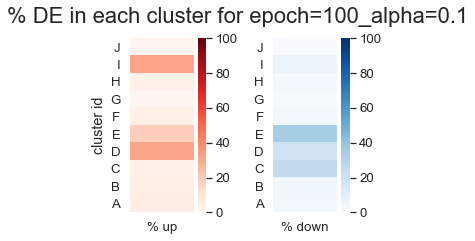

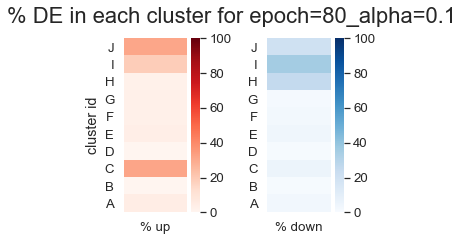

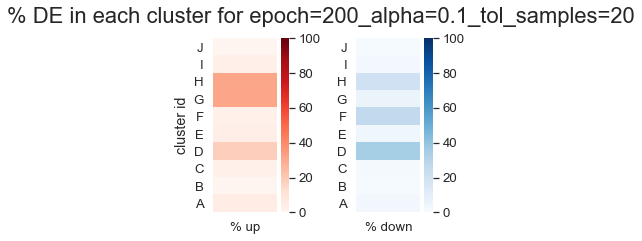

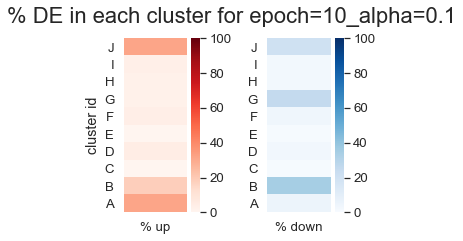

In [13]:
for kmeans, name in zip(kmeans_list, emb_names):
    cluster_DE_perc(kmeans, name, deseq)

# K means cluster and alcohol trait correlation

In [12]:
expression_meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta.csv', low_memory = False)

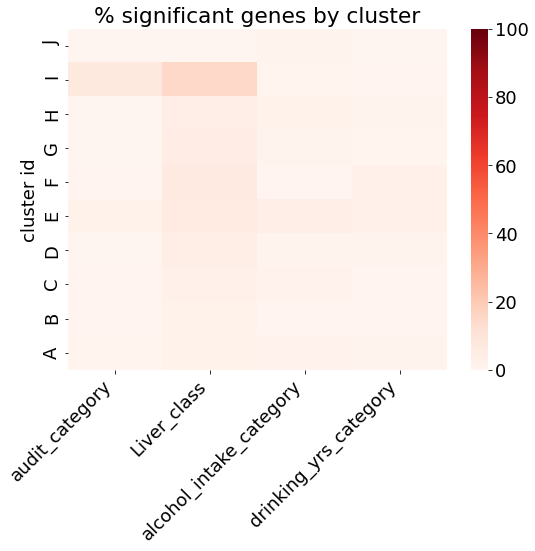

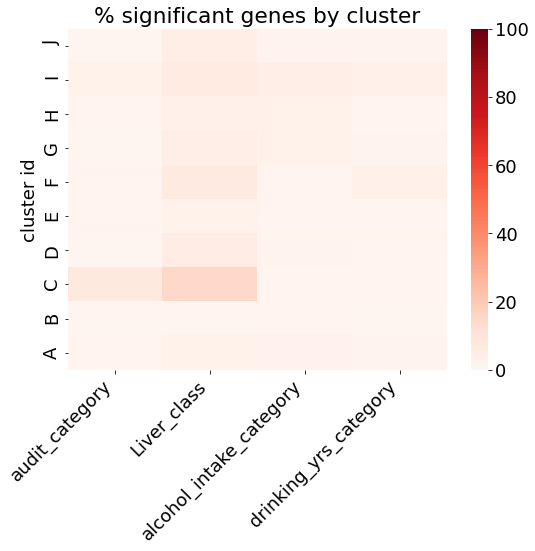

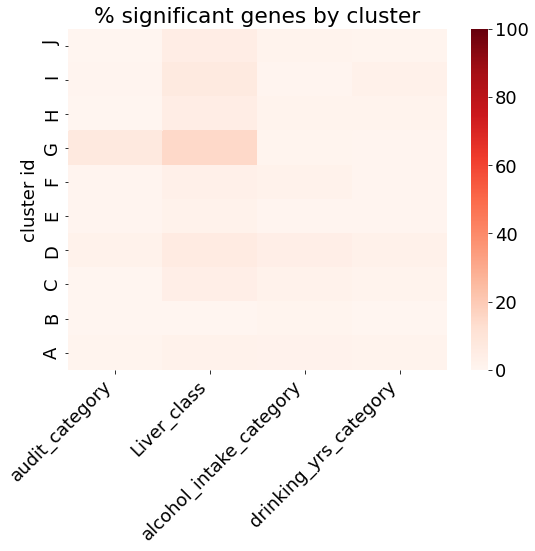

Wall time: 13min 28s


In [18]:
%%time
for kmeans, name in zip(kmeans_list, emb_names):
    plot_sig_perc(kmeans, 'kmean_label', name, expression_meta)

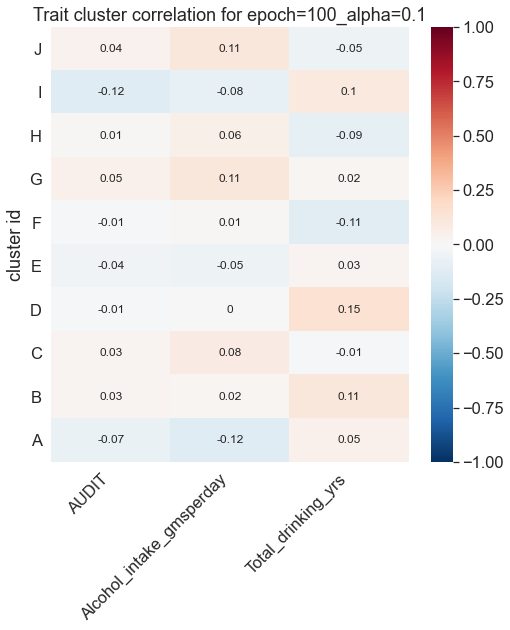

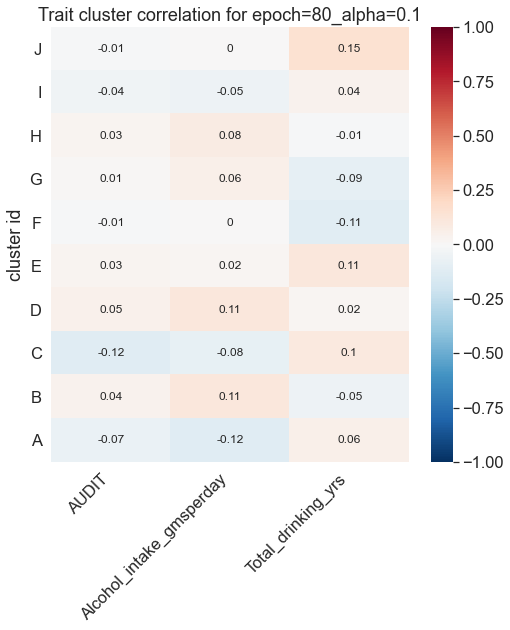

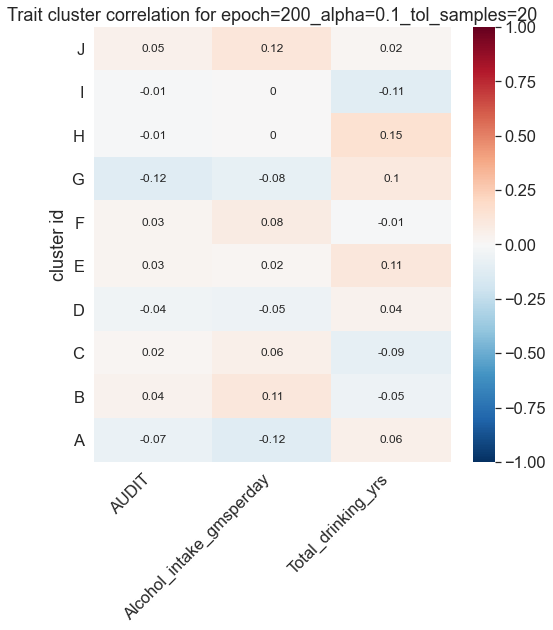

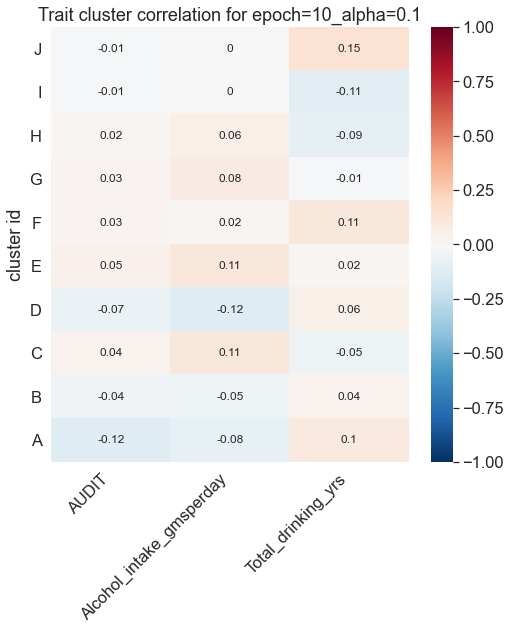

Wall time: 13.7 s


In [15]:
%%time
for kmeans, name in zip(kmeans_list, emb_names):
    cluster_phenotype_corr(kmeans, 'kmean_label', name, expression_meta)

# Overlap the % significant genes distribution between network and embedding

In [10]:
comm_df1 = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')

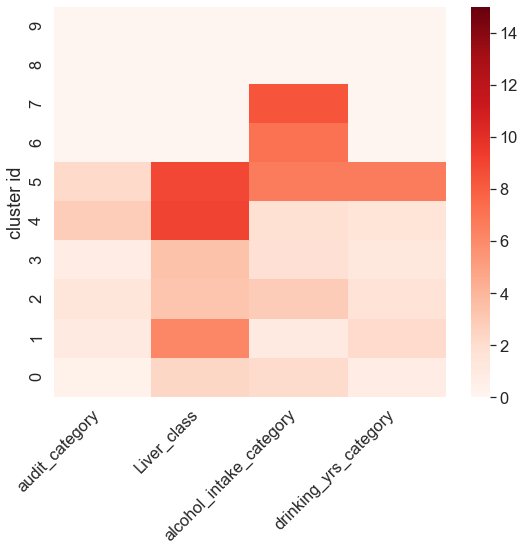

In [16]:
network_cluster_sig_df = plot_sig_perc(comm_df1, 'louvain 1', expression_meta, output_sig_df = True)

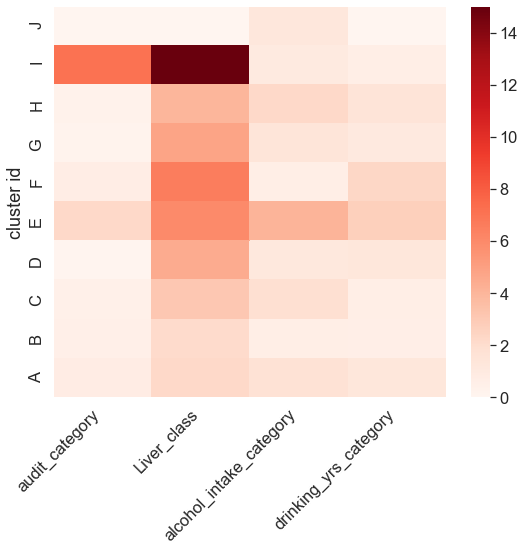

In [17]:
emb_cluster_sig_df = plot_sig_perc(kmeans, emb_name, expression_meta, output_sig_df = True)

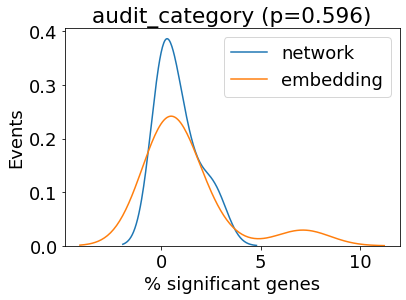

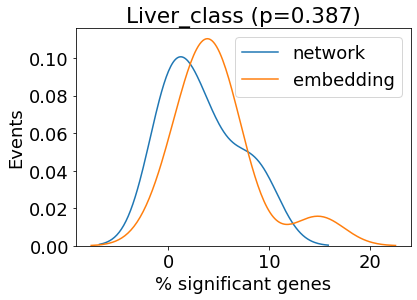

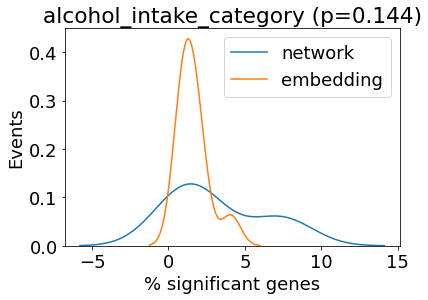

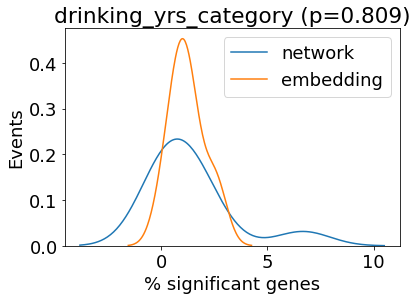

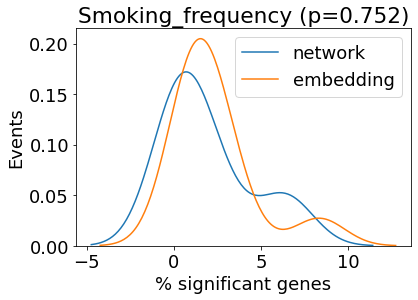

In [50]:
for col in network_cluster_sig_df.columns:
    network_values = network_cluster_sig_df[col]
    emb_values = emb_cluster_sig_df[col]
    ttest_pvalue = ttest_ind(network_values, emb_values)[1]
    plot_dist(network_values, 'network', '', 'significance')
    round_p = round(ttest_pvalue, 3)
    plot_dist(emb_values, 'embedding', f'{col} (p={round_p})' if round_p > 0 else f'{col} (p < 0.001)', 'significance')
    plt.show()
    plt.close()

# Overlap the coefficient distribution between network and embedding

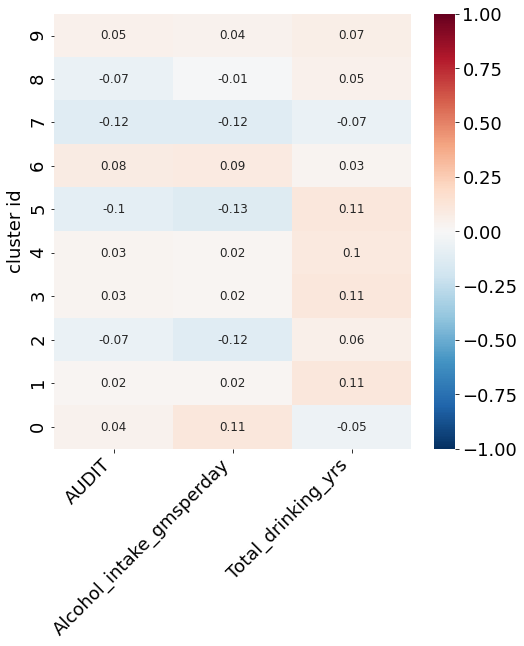

In [13]:
network_cluster_corr = cluster_phenotype_corr(comm_df1, 'louvain_label', 'louvain 1', expression_meta, output_corr_df = True)

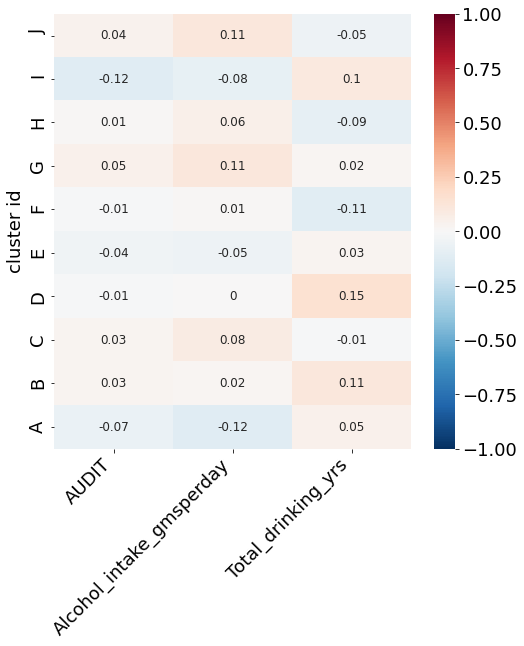

In [16]:
emb_cluster_corr = cluster_phenotype_corr(kmeans, 'kmean_label', emb_name, expression_meta, output_corr_df = True)

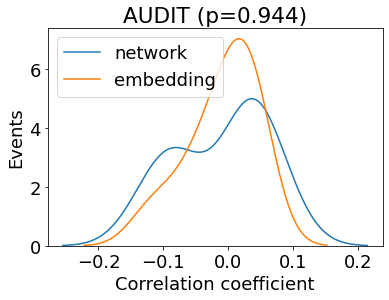

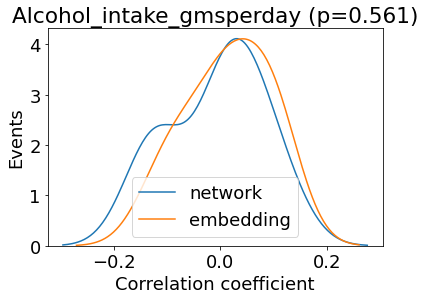

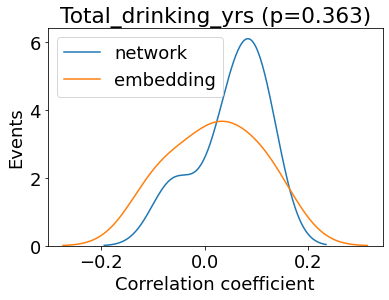

In [17]:
for col in network_cluster_corr.columns:
    network_values = network_cluster_corr[col]
    emb_values = emb_cluster_corr[col]
    ttest_pvalue = ttest_ind(network_values, emb_values)[1]
    round_p = round(ttest_pvalue, 3)
    plot_dist(network_values, 'network', '', 'correlation')
    plot_dist(emb_values, 'embedding', f'{col} (p={round_p})' if round_p > 0 else f'{col} (p < 0.001)', 'correlation')
    plt.show()
    plt.close()

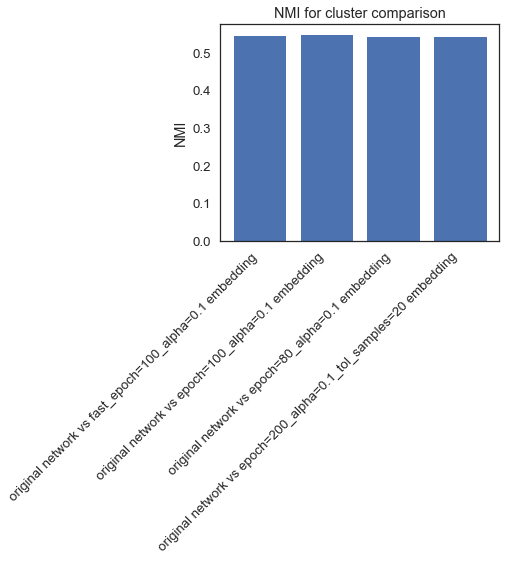

In [48]:
# for kmeans, name in zip(kmeans_list, emb_names):
network_comparison_names = ['original network' + f' vs {emb_names[i]} embedding' for i in range(len(emb_names))]
plot_cluster_nmi_comparison_v3('network', cluster1 = louvain_default, cluster1_column = 'louvain_label', 
                               cluster2_list= kmeans_list, cluster2_column = 'kmean_label', comparison_names = network_comparison_names)

In [7]:
print('NMI between network modules and embedding clusters is')
cluster_nmi_v3(louvain_default, 'louvain_label', kmeans, 'kmean_label')

NMI between network modules and embedding clusters is


0.549783691833946

In [ ]:
network_comparison_name = ['Network' + f' vs {emb_name} embedding']
plot_cluster_nmi_comparison_v3('Network', cluster1 = louvain_default, cluster1_column = 'louvain_label',
                               cluster2_list= [kmeans], cluster2_column = 'kmean_label', comparison_names = network_comparison_name)

# NMI comparison between using subnetwork embedding and whole network embedding

In [2]:
comm_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')

In [3]:
deseq = pd.read_excel(prefix + '/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')

In [11]:
emb1 = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\embedding_derived\embedding_Jan12\embedded_len16_walk100_module[4]_n_[2]_df.csv', index_col = 0)

In [10]:
emb2 = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\embedding_derived\embedding_Jan12\embedded_len16_walk100_module[4]_n_[0]_df.csv', index_col = 0)

In [6]:
embedding_path = prefix +'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Feb16/embedded_ggvec_epoch=100_alpha=0.1.csv'
emb_df = pd.read_csv(embedding_path, index_col = 0)

In [17]:
emb_list2 = [emb1, emb2, emb_df]
emb_names = ['sub emb1', 'sub emb2', 'whole emb']

In [13]:
kmeans_list = []
for emb in emb_list2:
    kmeans_list.append(run_kmeans(emb, 10))

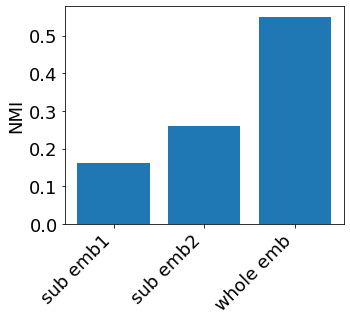

In [20]:
plot_cluster_nmi_comparison_v3('network', cluster1 = comm_df, cluster1_column = 'louvain_label', 
                               cluster2_list= kmeans_list, cluster2_column = 'kmean_label', comparison_names = emb_names)